### tall

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
import xgboost as xgb
import seaborn as sns
from sklearn import metrics
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [84]:
dataset = pd.read_csv('DBClassifiedFinal.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])

In [85]:
invalid_idx = []
for ii in range(len(dataset)):
    x = dataset.iloc[ii].cast
    if (len(x) > 100) or x == '[]':
        invalid_idx.append(ii)
        
print("Drop all invalid rows:", len(invalid_idx))

Drop all invalid rows: 136


In [86]:
dataset = dataset.drop(invalid_idx)
dataset = dataset.drop_duplicates()

In [87]:
dataset.to_csv('DBClassifiedFinal_Final_After_Cleaning.csv')
dataset

,title,movie_id,cast,budget,revenue,producers,writers,directors
0,Avatar,19995,2.922917223654528,2.370000,27.879651,29.613839,12.897685,6.448842
1,Pirates of the Caribbean: At World's End,285,1.2913461411252305,3.000000,9.610000,18.890153,10.035811,4.538591
2,Spectre,206647,2.7319103842129633,2.450000,8.806746,8.528419,31.454472,3.099638
3,The Dark Knight Rises,49026,1.4108010609649992,2.500000,10.849391,14.449937,20.059641,5.333298
4,John Carter,49529,1.4981138058730157,2.600000,2.841391,13.394146,12.193621,6.308121
5,Spider-Man 3,559,1.5714168282255698,2.580000,8.908716,15.732702,22.419660,2.128006
6,Tangled,38757,2.4580592091222218,2.600000,5.917949,3.634043,6.184218,10.426824
7,Avengers: Age of Ultron,99861,2.5917610153729314,2.800000,14.054037,5.898138,4.735849,4.735849
8,Harry Potter and the Half-Blood Prince,767,4.052299066759259,2.500000,9.339592,18.950739,7.512092,4.753488
9,Batman v Superman: Dawn of Justice,209112,2.983245064082181,2.500000,8.732602,7.649305,9.092931,3.517222


### Spilt the data into train and test set

In [88]:
number_of_rows = len(dataset)
print("Total samples: {}".format(len(dataset)))
num_train = int(0.80 * number_of_rows)

Total samples: 4669


In [89]:
x = dataset[['cast', 'budget', 'producers', 'writers', 'directors']].values
y = dataset['revenue'].values 

In [90]:
rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))

In [91]:
x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

In [92]:
print("Train size: {}".format(len(x_train)))
print("Test size: {}".format(len(x_test)))

Train size: 3735
Test size: 934


## Model

In [93]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [148]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [178]:
KNN_model = KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=1,
          weights='distance')
KNN_model.fit(x_train, y_train)
y_pred_KNN = KNN_model.predict(x_test)

In [179]:
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
y_pred_Linear = Linear_model.predict(x_test)

In [180]:
xg_model = xgb.XGBRegressor()
xg_model.fit(x_train, y_train)
y_pred_xg = dt_model.predict(x_test)

In [182]:
# SGD_model = SGDRegressor()
# SGD_model.fit(x_train, y_train)
# y_pred_SGD = SGD_model.predict(x_test)

In [183]:
# Logistic_model = LogisticRegression()
# Logistic_model.fit(x_train, y_train)
# y_pred_Logistic = Logistic_model.predict(x_test)

In [184]:
print('MSE RandomForestRegressor:', metrics.mean_squared_error(y_test, y_pred_rf))
print('MSE DecisionTreeRegressor:', metrics.mean_squared_error(y_test, y_pred_dt))
print('MSE KNeighborsRegressor:', metrics.mean_squared_error(y_test, y_pred_KNN))
print('MSE LinearRegression:', metrics.mean_squared_error(y_test, y_pred_Linear))
#print('MSE LogisticRegression:', metrics.mean_squared_error(y_test, y_pred_Logistic))
print('MSE XGBRegressor:', metrics.mean_squared_error(y_test, y_pred_xg))
print('MSE SGDRegressor:', metrics.mean_squared_error(y_test, y_pred_xg))
df = pd.DataFrame({'Actual':y_test, 'Predicted_RF':y_pred_rf, 'Predicted_DT':y_pred_dt, 'Predicted_KNN': y_pred_KNN, 'Predicted_Linear': y_pred_Linear, 'Predicted_XGB': y_pred_xg,  'Predicted_Linear': y_pred_Linear, 'Predicted_SGD': y_pred_SGD})
df

MSE RandomForestRegressor: 4.5683230415356055
MSE DecisionTreeRegressor: 5.303323049792027
MSE KNeighborsRegressor: 5.386894571383323
MSE LinearRegression: 3.212514379443639
MSE XGBRegressor: 5.303323049792027
MSE SGDRegressor: 5.303323049792027


,Actual,Predicted_RF,Predicted_DT,Predicted_KNN,Predicted_Linear,Predicted_XGB,Predicted_SGD
0,6.779454,1.367059,1.146608,1.297544,1.654034,1.146608,3.191598
1,0.367339,0.732772,0.600521,0.818499,1.234271,0.600521,2.790506
2,0.174600,0.355093,0.049222,0.296004,-0.063819,0.049222,0.260623
3,0.001000,0.154810,0.207195,0.099925,0.318444,0.207195,1.131974
4,0.166330,0.533166,0.291000,0.364807,0.734025,0.291000,1.567504
5,0.221656,0.268924,0.189020,0.289657,0.099245,0.189020,0.290004
6,1.672216,1.279385,1.457933,0.980703,0.834612,1.457933,2.292669
7,2.401593,1.487704,1.245964,1.578056,1.795639,1.245964,2.868984
8,0.030609,0.019087,0.014316,0.022174,0.074467,0.014316,0.164306
9,0.169000,0.299360,0.120000,0.273365,0.309940,0.120000,0.465381


In [156]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

<IPython.core.display.Javascript object>


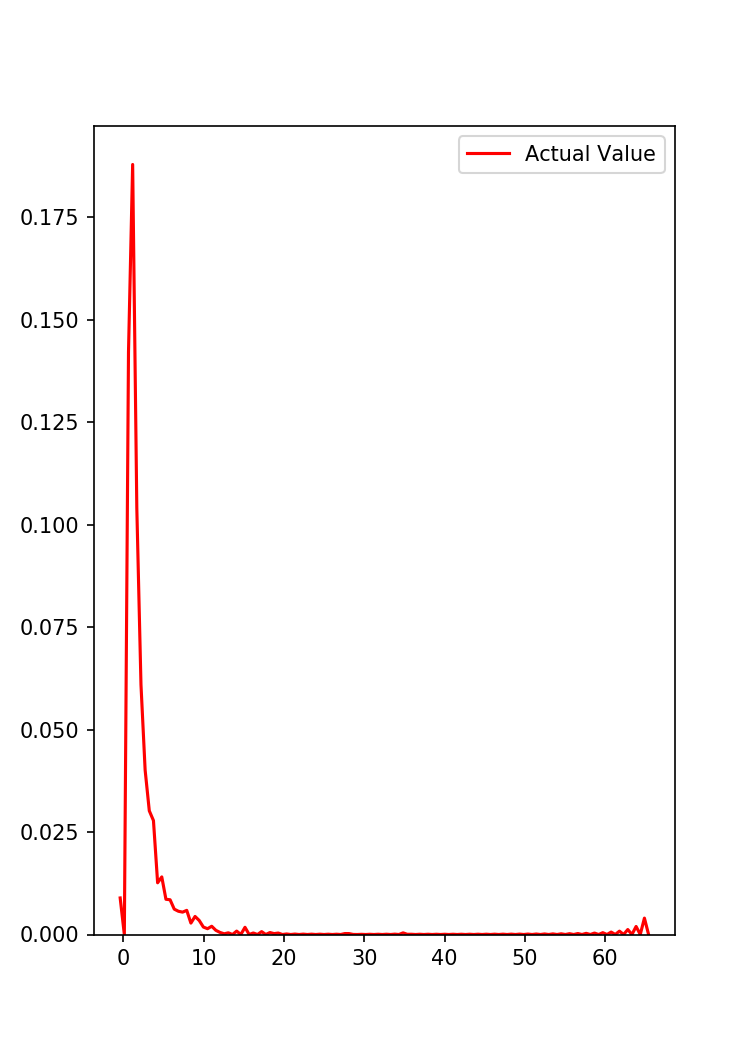

C:\Users\Chen Havakuk 1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'y_pred' is not defined

In [157]:
plt.figure(figsize=(5, 7))

ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for Price')

plt.show()
plt.close()

# grid

# KNN model

In [176]:
params = {
    'n_neighbors' : [5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10,20,30,40,50],
     'p': [1,2]
}
grid_kn = GridSearchCV(estimator = KNN_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(x_train, y_train)
print(grid_kn.best_estimator_)
print(grid_kn.score(x_test, y_test))

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 1291 tasks      | elapsed:  1.1min


KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=20, p=1,
          weights='distance')
-5.386894571383323


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.4min finished


# rf model

In [ ]:
params = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'criterion': ['mse', 'mae'],
    #'max_depth': ['none'],
    'min_samples_split': [2,5,8,10,15],
    'max_features': ['auto','sqrt','log2']
}
grid_rf = GridSearchCV(estimator = rf_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_rf.fit(x_train, y_train)
print(grid_rf.best_estimator_)
print(grid_rf.score(x_test, y_test))

# dt_model

In [185]:
params = {
    'criterion': ['mse', 'mae','friedman_mse'],
    'splitter': ['best','random'],
    'min_samples_split': [2,5,8,10,15],
    'max_features': ['auto','sqrt','log2']
}
grid_dt = GridSearchCV(estimator = dt_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_dt.fit(x_train, y_train)
print(grid_dt.best_estimator_)
print(grid_dt.score(x_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


DecisionTreeRegressor(criterion='friedman_mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='random')
-6.416624995139161


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    5.5s finished


# Linear_model 


In [187]:
params = {
    'fit_intercept' : ['true', 'false'],
    #'normalizebool': ['true', 'false'],
    'copy_X': ['true', 'false']  
}
grid_lr = GridSearchCV(estimator = Linear_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_lr.fit(x_train, y_train)
print(grid_lr.best_estimator_)
print(grid_lr.score(x_test, y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


LinearRegression(copy_X='true', fit_intercept='true', n_jobs=None,
         normalize=False)
-3.212514379443639


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.7s finished


# xg_model

In [ ]:
params = {
    'data' : ['true', 'false'],
    'label': ['true', 'false'],
    'missing': ['true', 'false']  
}
grid_xg = GridSearchCV(estimator = xg_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_xg.fit(x_train, y_train)
print(grid_xg.best_estimator_)
print(grid_xg.score(x_test, y_test))

In [16]:
# random_state = 38
# log_clf = LogisticRegression(random_state=random_state, solver='lbfgs')
# svm_clf = SVC(random_state=random_state)
# voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

In [18]:
# for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))